In [2]:
from src.utils import *

In [3]:
data = get_data()
data.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157'

In [4]:
opportunities = get_opportunity_list(data)

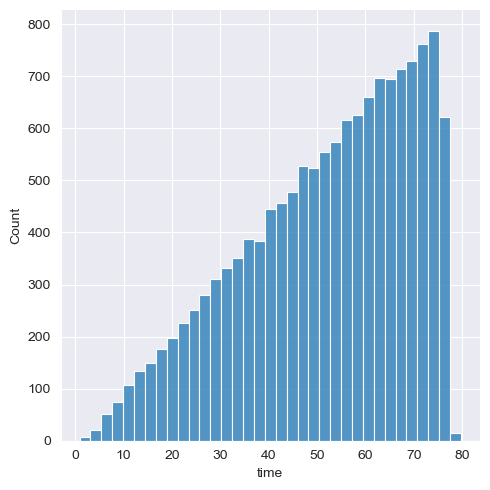

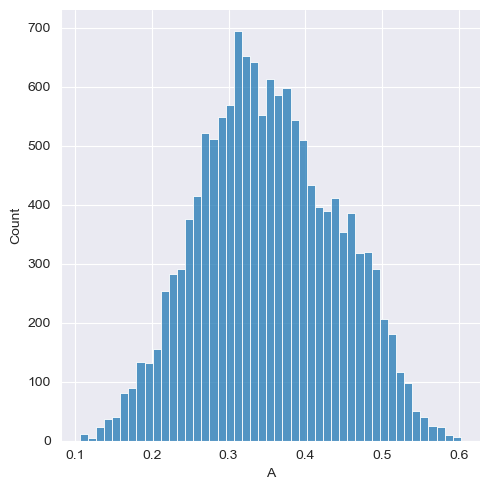

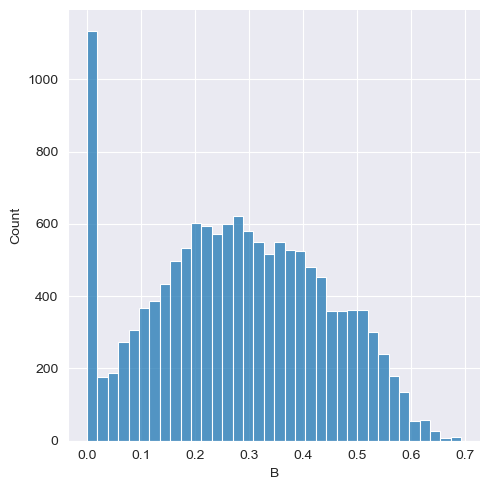

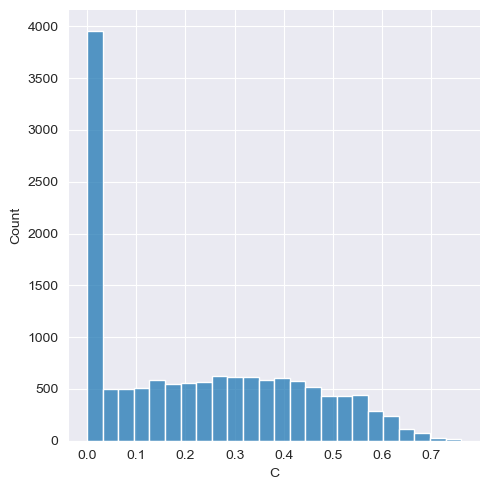

In [7]:
import seaborn as sns
sns.displot(opportunities.time)
sns.displot(opportunities.A)
sns.displot(opportunities.B)
sns.displot(opportunities.C)

In [9]:
df = opportunities
df.describe()

,time,station,asteroid,A,B,C
count,13920.000000,13920.000000,13920.000000,13920.000000,13920.000000,13920.000000
mean,51.835269,6.498276,171.537644,0.351859,0.279393,0.230042
std,17.683639,3.456689,102.463820,0.088761,0.160341,0.201606
min,0.893000,1.000000,1.000000,0.106008,0.000000,0.000000
25%,39.386000,3.000000,70.000000,0.288022,0.163279,0.000000
50%,54.811000,6.000000,178.000000,0.348056,0.278023,0.211726
75%,66.687000,10.000000,260.000000,0.415699,0.400179,0.394748
max,79.753000,12.000000,340.000000,0.602607,0.692832,0.760745


In [13]:
station_groups = df.groupby('station')
station_groups.count().time

station
1     1163
2     1170
3     1158
4     1155
5     1159
6     1156
7     1165
8     1161
9     1150
10    1149
11    1163
12    1171
Name: time, dtype: int64

In [28]:
used = np.zeros(340+1)
used[26] = 1
all_ops = df.iloc[0:4]
all_ops
all_ops = all_ops[used[all_ops.asteroid]==0]
a = all_ops[['A', 'B', 'C']].sum(axis=0).min()
type(a), a

(float, 0.907996)

In [31]:
all_ops.iloc[:2].index

Int64Index([1, 3], dtype='int64')

In [42]:
station_groups = df.groupby('station')
station_groups.indices[1] [2]

14

In [37]:
9/0.35

25.714285714285715

<AxesSubplot:ylabel='station'>

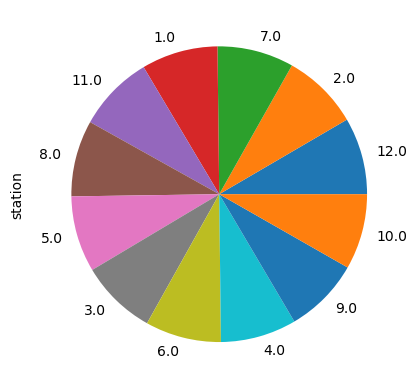

In [68]:
df.station.value_counts().plot.pie()

<AxesSubplot:ylabel='asteroid'>

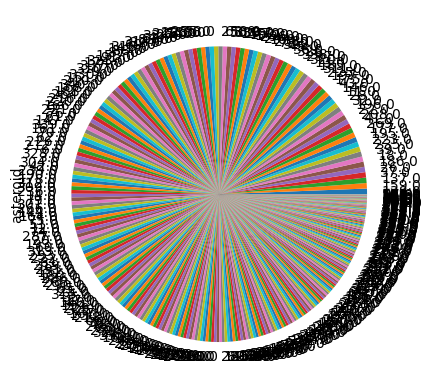

In [67]:
df.asteroid.value_counts().plot.pie()

In [73]:
asteroids = df.asteroid.unique().shape[0]

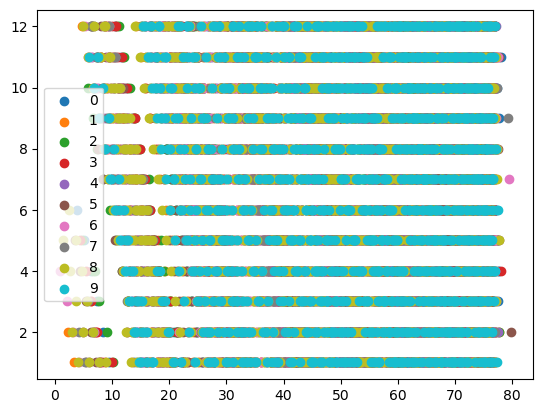

In [76]:
import matplotlib.pyplot as plt
# group = df.groupby("asteroid")[["time", 'station']]
# for g in group:
    # print(g)
    # break
    # plt.scatter(g[1].time, g[1].station, label=g[0]//60)
k = 10
for i in range(k):
    g = df[df.asteroid%k==i]
    plt.scatter(g.time, g.station, label=i)
plt.legend()

In [91]:
import random
sub = random.choices(np.arange(asteroids), k=12)
sub

[234, 177, 203, 280, 220, 119, 250, 144, 168, 321, 119, 131]

Text(0.5, 0, 'time/day')

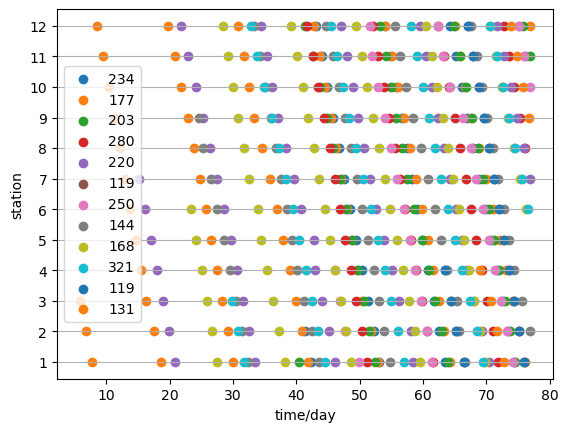

In [108]:
# plt.figure(figsize=(12, 6))
for aster in sub:
    g = df[df.asteroid==aster]
    plt.scatter(g.time, g.station, label=aster)
plt.legend()
plt.grid(axis='y')
plt.yticks(np.arange(12)+1)
plt.ylabel('station')
plt.xlabel('time/day')

In [ ]:
# 大概至少要做25个机会之后,再开始下一个人.

Text(0.5, 0, 'time/day')

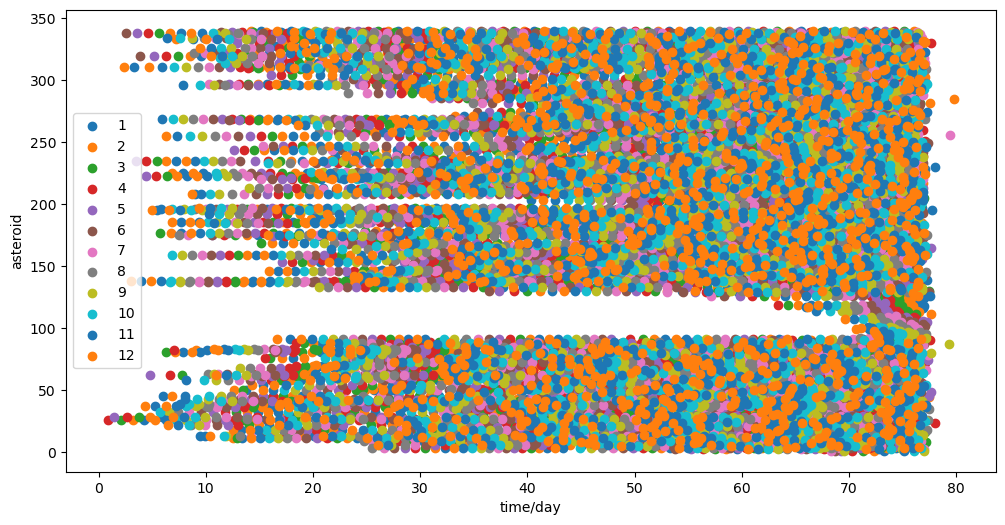

In [110]:
plt.figure(figsize=(12, 6))
for station in range(1, 12+1):
    g = df[df.station==station]
    plt.scatter(g.time, g.asteroid, label=station)
plt.legend()
# 这个也是点一行，炸一行。
# plt.grid(axis='y')
# plt.yticks(np.arange(asteroids)+1)
plt.ylabel('asteroid')
plt.xlabel('time/day')